In [2]:
import pandas as pd
from sklearn.datasets import load_iris
data=load_iris()

In [13]:
x=data['data']

In [15]:
y=data['target']

# Basic statistics

In [29]:
import statistics as st
import numpy as np

##### Mean of full sample

In [24]:
x.mean(axis=0)

array([5.84333333, 3.054     , 3.75866667, 1.19866667])

##### Median of full sample

In [31]:
np.median(x,axis=0)

array([5.8 , 3.  , 4.35, 1.3 ])

##### Mean per type of flower

In [35]:
np.mean(x[y==0],axis=0)

array([5.006, 3.418, 1.464, 0.244])

In [36]:
np.mean(x[y==1],axis=0)

array([5.936, 2.77 , 4.26 , 1.326])

In [37]:
np.mean(x[y==2],axis=0)

array([6.588, 2.974, 5.552, 2.026])

##### Pandas dataframe to build a table with mean per flower 

In [47]:
data_pd = pd.DataFrame({'x1':x[:,0], 'x2':x[:,1], 'x3':x[:,2], 'x4':x[:,3], 'y':y})

In [49]:
data_pd.head()

,x1,x2,x3,x4,y
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [53]:
aggregate = {
    'x1':'mean','x2':'mean','x3':'mean','x4':'mean'
}
data_pd.groupby('y').agg(aggregate)

,x1,x2,x3,x4
y,,,,
0,5.006,3.418,1.464,0.244
1,5.936,2.770,4.260,1.326
2,6.588,2.974,5.552,2.026


In [54]:
import matplotlib.pyplot as plt
import pandas as pd
from math import pi

In [55]:
table = data_pd.groupby('y').agg(aggregate)

In [74]:
# number of variables to be plot
categories = list(table[1:])
N = len(categories)

In [75]:
categories,N

(['x1', 'x2', 'x3', 'x4'], 4)

In [76]:
# Dividing the angles per variable to be plot
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

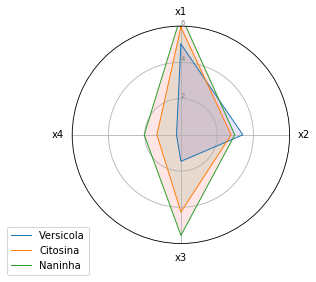

In [92]:
ax = plt.subplot(111, polar=True)

ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)

plt.xticks(angles[:-1], categories)
ax.set_rlabel_position(0)

plt.yticks([2,4,6], ["2","4","6"], color="grey", size=7)
plt.ylim(0,6)

values=table.loc[0].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Versicola")
ax.fill(angles, values, 'b', alpha=0.1)

values=table.loc[1].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Citosina")
ax.fill(angles, values, 'g', alpha=0.1)

values=table.loc[2].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Naninha")
ax.fill(angles, values, 'r', alpha=0.1)

plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))